In [1]:
from SCTransform import SCTransform
#https://github.com/atarashansky/SCTransformPy
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [2]:
#adata = sc.datasets.pbmc3k()
datapath='input_vizgen_liver/alldata/'
ad_sc_full = sc.read_h5ad(datapath+'sc_liver_data.h5ad')
ad_sc_full

AnnData object with n_obs × n_vars = 185894 × 31053

In [3]:
ad_sp_full=sc.read(datapath+'Blank_genes_removed.csv').transpose()
ad_sp_full.var_names_make_unique()
ad_sp_full

AnnData object with n_obs × n_vars = 395215 × 347

In [5]:
sp_cellname=ad_sp_full.obs_names.to_numpy()
sp_genename=ad_sp_full.var_names.to_numpy()
sc_cellname=ad_sc_full.obs_names.to_numpy()
sc_genename=ad_sc_full.var_names.to_numpy()
print(len(sp_cellname),len(sp_genename))
print(len(sc_cellname),len(sc_genename))

395215 347
185894 31053


In [6]:
#find common genes 
index_sc=[]
index_sp=[]
d={}
for j in range(len(sc_genename)):
    name=sc_genename[j]
    d[name]=j
    
for i in range(len(sp_genename)):
    name=sp_genename[i]
    try: 
        d[name]
        flag=1
    except KeyError: 
        flag=0
    if flag==1:
        index_sc.append(d[name])
        index_sp.append(i)

print(len(index_sc),len(index_sp))

346 346


In [7]:
ad_sc=ad_sc_full[:,index_sc]
ad_sp=ad_sp_full[:,index_sp]

View of AnnData object with n_obs × n_vars = 185894 × 346
View of AnnData object with n_obs × n_vars = 395215 × 346
AnnData object with n_obs × n_vars = 185894 × 31053
AnnData object with n_obs × n_vars = 395215 × 347


In [9]:
ad_sp_full1=sc.read(datapath+'Blank_genes_removed.csv').transpose()
ad_sp_full1.var_names_make_unique()

ad_sp_full2=sc.read(datapath+'Blank_genes_removed.csv').transpose()
ad_sp_full2.var_names_make_unique()


In [10]:
ad_sp_trans_com=ad_sp_full1[:,index_sp]
ad_sp_trans_ful=ad_sp_full2[:,index_sp]

In [11]:
print(ad_sc_full)
print(ad_sc)
print(ad_sp)
print(ad_sp_trans_com)
print(ad_sp_trans_ful)

AnnData object with n_obs × n_vars = 185894 × 31053
View of AnnData object with n_obs × n_vars = 185894 × 346
View of AnnData object with n_obs × n_vars = 395215 × 346
View of AnnData object with n_obs × n_vars = 395215 × 346
View of AnnData object with n_obs × n_vars = 395215 × 346


In [15]:
# Full single cell data 
sc.pp.normalize_total(ad_sc_full, inplace=True)
sc.pp.log1p(ad_sc_full)
sc.pp.highly_variable_genes(ad_sc_full, flavor="seurat", n_top_genes=5000)
sc.pp.pca(ad_sc_full)
#sc.pp.neighbors(ad_sc_full,n_pcs=30)
#sc.tl.umap(ad_sc_full)
#sc.tl.leiden(ad_sc_full, key_added="leiden")

In [ ]:
#sc.pl.umap(ad_sc_full,color=['leiden'],title=["full sc genes"],wspace=0.2)

In [16]:
# single cell common genes 
sc.pp.normalize_total(ad_sc, inplace=True)
sc.pp.log1p(ad_sc)
sc.pp.pca(ad_sc)
#sc.pp.neighbors(ad_sc,n_pcs=30)
#sc.tl.umap(ad_sc)
#sc.tl.leiden(ad_sc, key_added="leiden")

/Users/agrawal/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
#sc.pl.umap(ad_sc,color=['leiden'],title=["common sc genes"],wspace=0.2)

In [14]:
sc.pp.filter_cells(ad_sp, min_counts=1)
sc.pp.filter_cells(ad_sp_trans_com, min_counts=1)
sc.pp.filter_cells(ad_sp_trans_ful, min_counts=1)


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [17]:
# spatial cell common genes 
sc.pp.normalize_total(ad_sp, inplace=True)
sc.pp.log1p(ad_sp)
sc.pp.pca(ad_sp)
sc.pp.neighbors(ad_sp,n_pcs=30)
sc.tl.umap(ad_sp)
sc.tl.leiden(ad_sp, key_added="leiden")

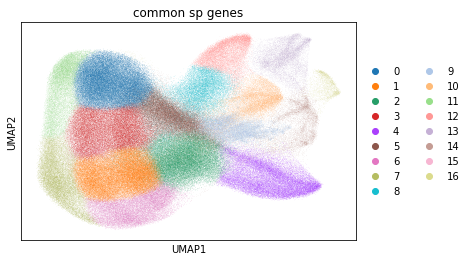

In [18]:
sc.pl.umap(ad_sp,color=['leiden'],title=["common sp genes"],wspace=0.2)

In [19]:
gene_sp_com=ad_sp.var_names.to_numpy()
gene_sc_com=ad_sc.var_names.to_numpy()
gene_sc_ful=ad_sc_full.var_names.to_numpy()

print(len(gene_sp_com),len(gene_sc_com),len(gene_sc_ful))

d={}
for i in range(len(gene_sc_ful)):
    d[gene_sc_ful[i]]=i
com=0
index=[]
for i in range(len(gene_sp_com)):
    if gene_sp_com[i]==gene_sc_com[i]:
        com+=1
    index.append(d[gene_sp_com[i]])    
print(len(gene_sp_com),len(gene_sc_com),com,len(index))

346 346 31053
346 346 346 346


In [21]:
print('sc',ad_sc.varm['PCs'].shape, ad_sc.X.shape)
print('sp',ad_sp.varm['PCs'].shape, ad_sp.X.shape)
print('sc full',ad_sc_full.varm['PCs'].shape, ad_sc_full.X.shape)

#print('\n')
#print('sc',sct_ad_sc.varm['PCs'].shape, sct_ad_sc.X.shape)
#print('sp',sct_ad_sp.varm['PCs'].shape, sct_ad_sp.X.shape)
#print('sc full',sct_ad_sc_full.varm['PCs'].shape, sct_ad_sc_full.X.shape)

sc_com_pc=ad_sc.varm['PCs']
sp_com_pc=ad_sp.varm['PCs']
sc_ful_pc=ad_sc_full.varm['PCs'][index,:]

sc (346, 50) (185894, 346)
sp (346, 50) (393878, 346)
sc full (31053, 50) (185894, 31053)


In [22]:
transfer_sc_com_pc_2_sp = np.matmul(ad_sp.X, sc_com_pc)
transfer_sc_ful_pc_2_sp = np.matmul(ad_sp.X, sc_ful_pc) 

print(transfer_sc_com_pc_2_sp.shape)
print(transfer_sc_ful_pc_2_sp.shape)

(393878, 50)
(393878, 50)


In [23]:
ad_sp_trans_com.obsm['transfer_sc_com_pc_2_sp']=transfer_sc_com_pc_2_sp
ad_sp_trans_ful.obsm['transfer_sc_ful_pc_2_sp']=transfer_sc_ful_pc_2_sp

In [97]:
# spatial cell common genes 
sc.pp.normalize_total(ad_sp_trans_com, inplace=True)
sc.pp.log1p(ad_sp_trans_com)
#sc.pp.pca(ad_sp)
sc.pp.neighbors(ad_sp_trans_com,n_pcs=30,use_rep='transfer_sc_com_pc_2_sp')
sc.tl.umap(ad_sp_trans_com)
sc.tl.leiden(ad_sp_trans_com, key_added="leiden")

In [96]:
sc.pp.normalize_total(ad_sp_trans_ful, inplace=True)
sc.pp.log1p(ad_sp_trans_ful)
sc.pp.neighbors(ad_sp_trans_ful,n_pcs=30,use_rep='transfer_sc_ful_pc_2_sp')
sc.tl.umap(ad_sp_trans_ful)
sc.tl.leiden(ad_sp_trans_ful, key_added="leiden")

In [26]:
print(ad_sp)
print(ad_sp_trans_ful)
print(ad_sp_trans_com)

AnnData object with n_obs × n_vars = 393878 × 346
    obs: 'n_counts', 'leiden'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'
AnnData object with n_obs × n_vars = 393878 × 346
    obs: 'n_counts', 'leiden'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'transfer_sc_ful_pc_2_sp', 'X_umap'
    obsp: 'distances', 'connectivities'
AnnData object with n_obs × n_vars = 393878 × 346
    obs: 'n_counts', 'leiden'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'transfer_sc_com_pc_2_sp', 'X_umap'
    obsp: 'distances', 'connectivities'


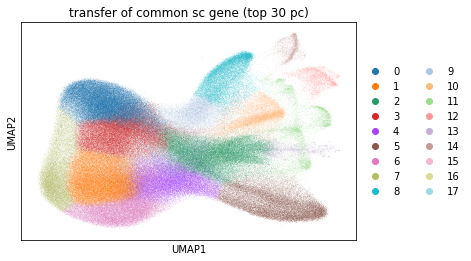

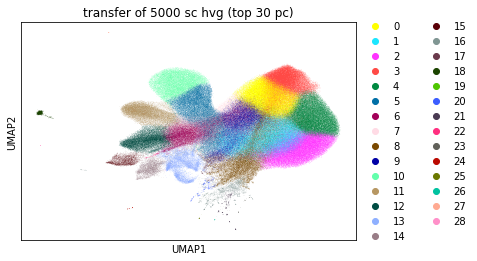

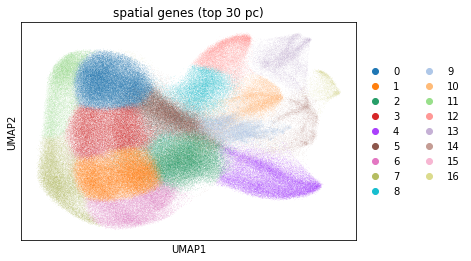

In [28]:
sc.pl.umap(ad_sp_trans_com,color=['leiden'],title=["transfer of common sc gene (top 30 pc)"],wspace=0.2)
sc.pl.umap(ad_sp_trans_ful,color=['leiden'],title=["transfer of 5000 sc hvg (top 30 pc)"],wspace=0.2)
sc.pl.umap(ad_sp,color=['leiden'],title=["spatial genes (top 30 pc)"],wspace=0.2)

In [101]:
def DEanalysis(ad_sp):
    sc.tl.rank_genes_groups(ad_sp, 'leiden', method='wilcoxon',key_added="wilcoxon")
    #sc.pl.rank_genes_groups(ad_sp, n_genes=25, sharey=False,show=True, save='_wilcoxon.png')

    n = len(np.unique(ad_sp.obs.leiden))
    wilcoxon=[]
    for i in range(n):
        dedf1 = sc.get.rank_genes_groups_df(ad_sp,key='wilcoxon',group=str(i))
        dedf1 = dedf1.to_numpy()
        wilcoxon.append(dedf1[0:5,0])


    sc.tl.rank_genes_groups(ad_sp, 'leiden', method='logreg',key_added = "logreg")
    sc.pl.rank_genes_groups(ad_sp, n_genes=25, sharey=False,key = "logreg")


    sc.tl.rank_genes_groups(ad_sp, 'leiden', method='t-test', key_added = "t-test")
    #sc.pl.rank_genes_groups(ad_sp, n_genes=25, sharey=False, key = "t-test")
    t_test=[]
    for i in range(n):
        dedf1 = sc.get.rank_genes_groups_df(ad_sp,key='t-test',group=str(i))
        dedf1 = dedf1.to_numpy()
        t_test.append(dedf1[0:5,0])
        
    return t_test, wilcoxon,n    

/Users/agrawal/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


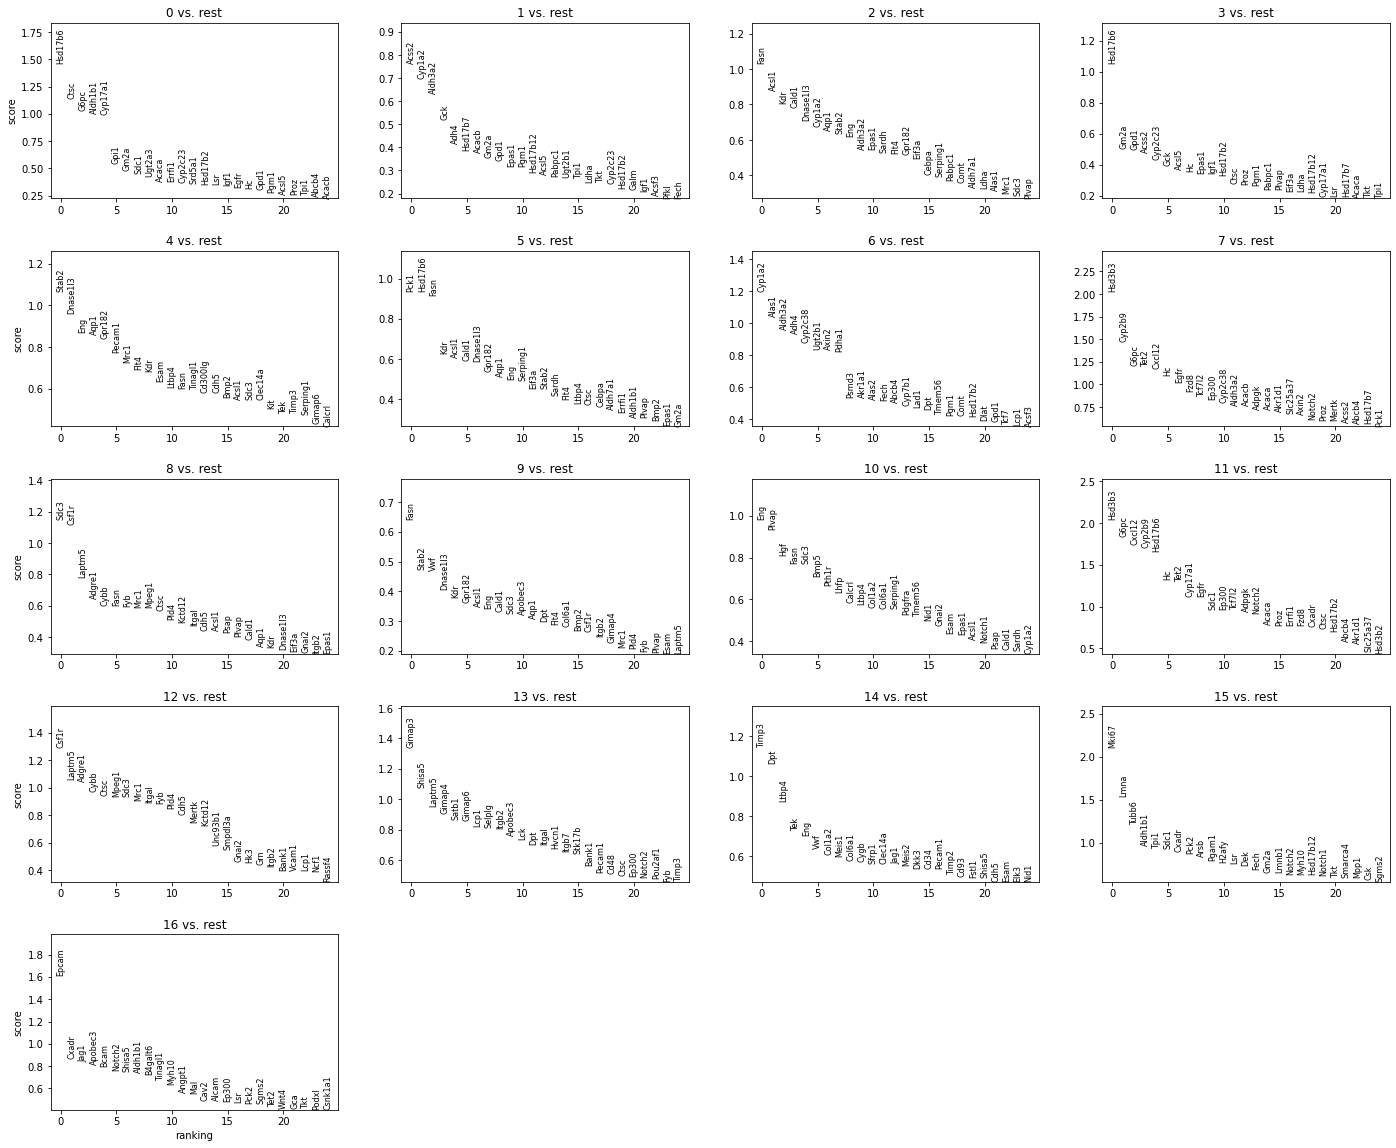

In [93]:
t_test,wilcoxon,n=DEanalysis(ad_sp)

In [94]:
#wc = sc.get.rank_genes_groups_df(ad_sc, group='0', pval_cutoff=0.01, log2fc_min=0)['names']
for i in range(n):
    a=set(t_test[i])
    b=set(wilcoxon[i])
    c=a.union(b)
    #print(t_test[i],wilcoxon[i])
    print(i,sorted(list(c)))

0 ['Aldh1b1', 'Ctsc', 'Cyp17a1', 'G6pc', 'Hsd17b6', 'Pck1']
1 ['Acsl1', 'Acss2', 'Aldh3a2', 'Cyp1a2', 'Gck']
2 ['Acsl1', 'Aldh3a2', 'Cald1', 'Cyp1a2', 'Eif3a', 'Epas1', 'Kdr']
3 ['Acsl1', 'Cyp2c23', 'Gm2a', 'Hc', 'Hsd17b6', 'Proz', 'Serping1']
4 ['Aqp1', 'Dnase1l3', 'Eng', 'Kdr', 'Stab2']
5 ['Aldh1b1', 'Aldh7a1', 'Cald1', 'Fasn', 'Hsd17b6', 'Pck1']
6 ['Abcb4', 'Alas1', 'Aldh3a2', 'Axin2', 'Comt', 'Cyp1a2']
7 ['Aldh3a2', 'Cyp2b9', 'Egfr', 'Hc', 'Hsd3b3', 'Tet2']
8 ['Csf1r', 'Laptm5', 'Mpeg1', 'Psap', 'Sdc3']
9 ['Aldoart2', 'F13a1', 'Flt3', 'Gfap', 'Hsd3b6', 'Jag2', 'Mpl', 'Tnfrsf13c']
10 ['Bmp5', 'Cxcl12', 'Eng', 'Hgf', 'Plvap', 'Pth1r']
11 ['Cyp2b9', 'Egfr', 'G6pc', 'Hc', 'Pck1']
12 ['Adgre1', 'Csf1r', 'Ctsc', 'Laptm5', 'Mpeg1', 'Psap', 'Sdc3']
13 ['Apobec3', 'Itgal', 'Itgb2', 'Laptm5', 'Lcp1', 'Shisa5']
14 ['Dpt', 'Eng', 'Fstl1', 'Ltbp4', 'Timp3']
15 ['Ldha', 'Lmna', 'Lsr', 'Mki67', 'Sdc1', 'Tpi1', 'Tubb6']
16 ['Apobec3', 'Bcam', 'Cxadr', 'Epcam', 'Notch2']


/Users/agrawal/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


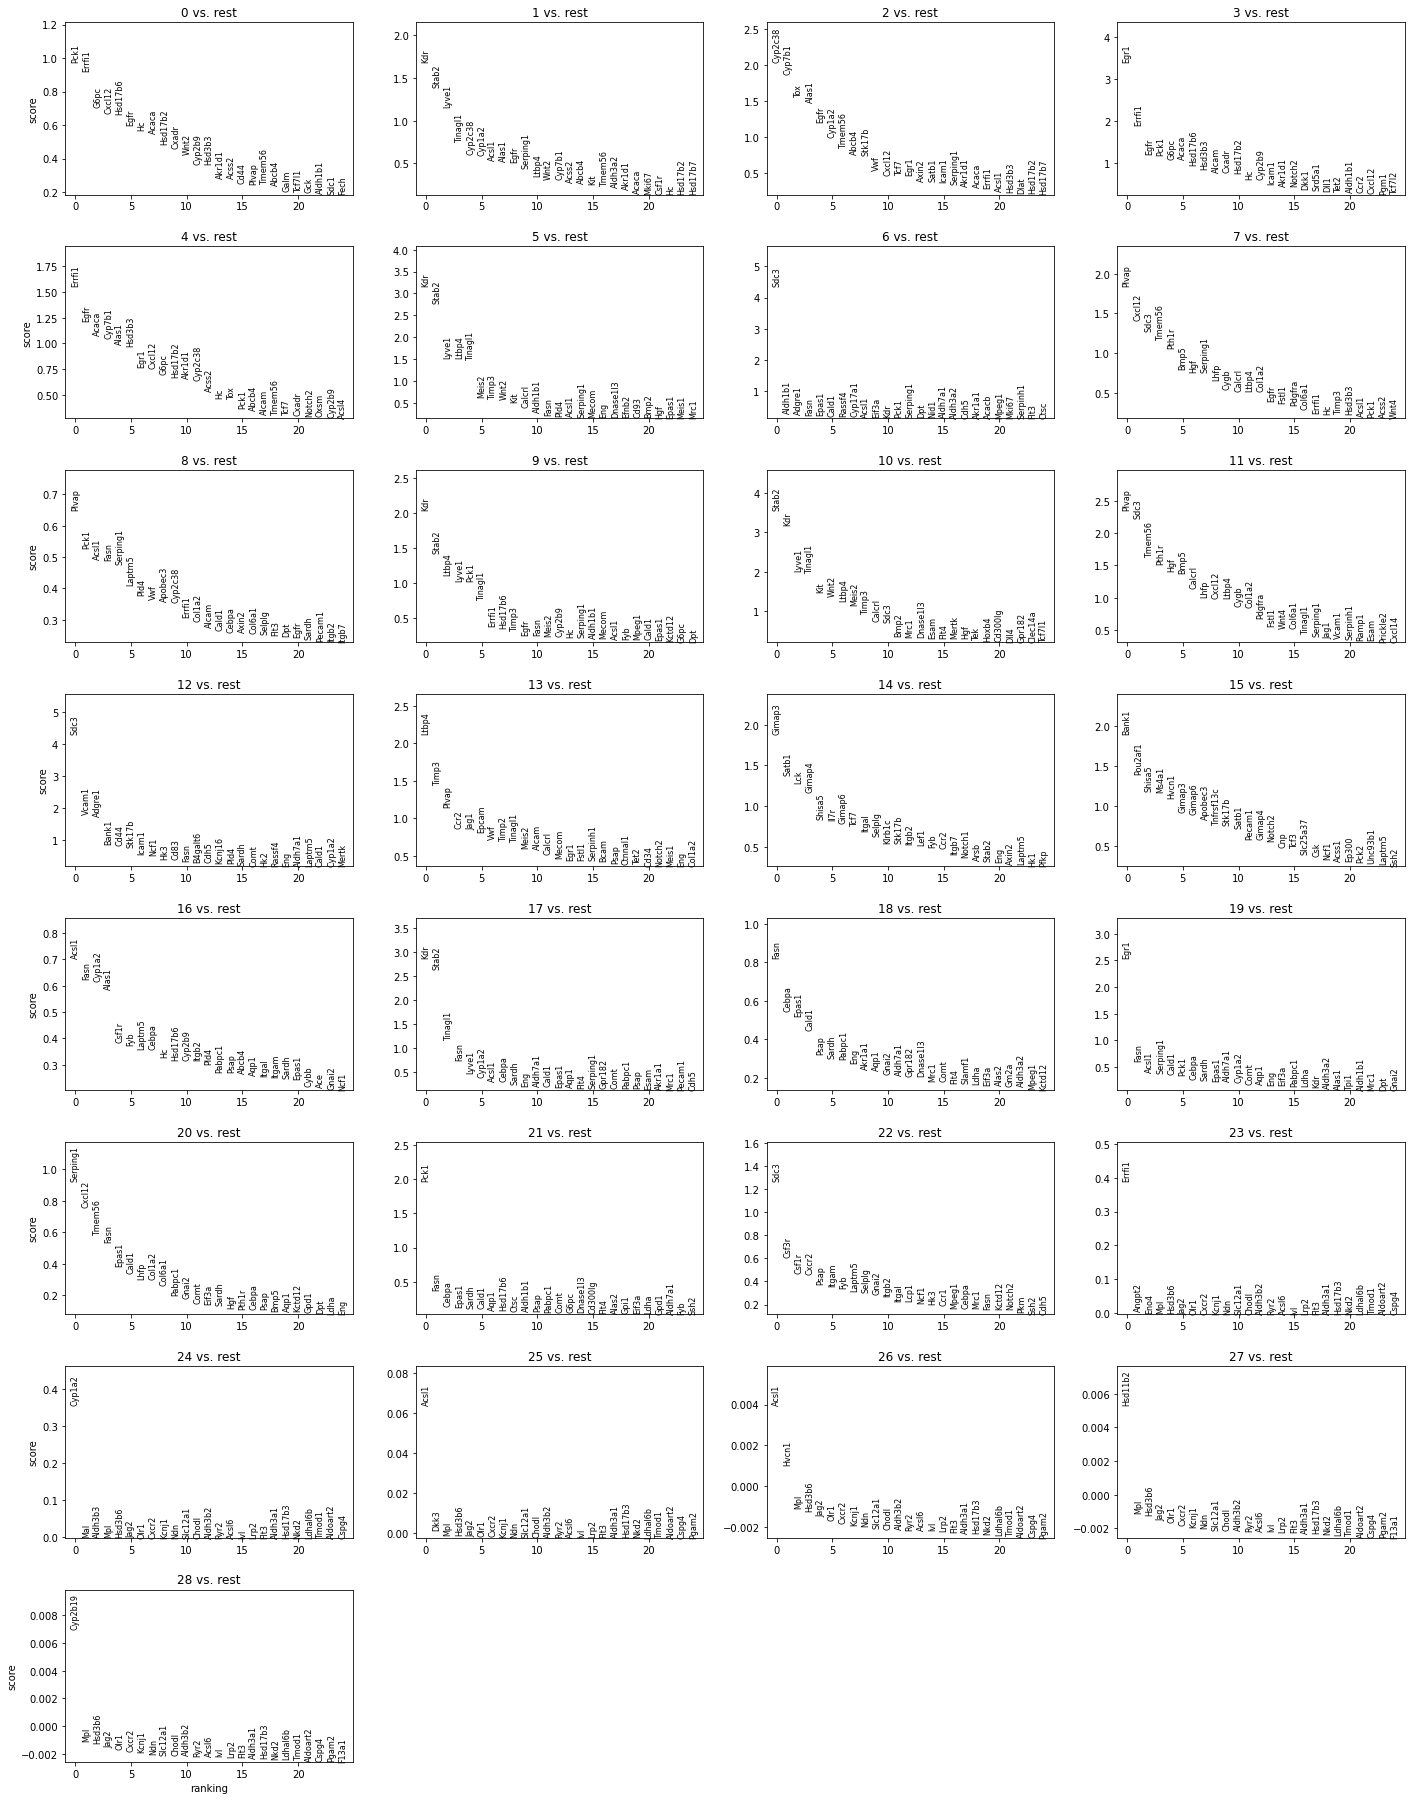

/Users/agrawal/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/agrawal/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/agrawal/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is hi

In [102]:
t_test_ful,wilcoxon_ful,n=DEanalysis(ad_sp_trans_ful)

In [103]:
print("full PC transfer")
for i in range(n):
    a=set(t_test_ful[i])
    b=set(wilcoxon_ful[i])
    c=a.union(b)
    #print(t_test[i],wilcoxon[i])
    print(i,sorted(list(c)))

full PC transfer
0 ['Aldh1b1', 'Cyp17a1', 'Egfr', 'G6pc', 'Hc', 'Hsd17b6', 'Pck1']
1 ['Acsl1', 'Aldh3a2', 'Comt', 'Cyp1a2', 'Ldha', 'Sardh']
2 ['Acsl1', 'Alas1', 'Aldh3a2', 'Comt', 'Cyp1a2', 'Cyp2c38']
3 ['Cyp17a1', 'Egfr', 'Errfi1', 'G6pc', 'Hc', 'Hsd17b6', 'Pck1']
4 ['Abcb4', 'Cyp2b9', 'Egfr', 'Hc', 'Hsd3b3', 'Proz']
5 ['Aqp1', 'Dnase1l3', 'Eng', 'Kdr', 'Stab2']
6 ['Adgre1', 'Csf1r', 'Cybb', 'Laptm5', 'Mpeg1', 'Psap', 'Sdc3']
7 ['Cald1', 'Cxcl12', 'Lhfp', 'Plvap', 'Pth1r', 'Serping1', 'Tmem56']
8 ['Acsl1', 'Cald1', 'Fasn', 'Flt3', 'Hsd3b6', 'Mpl', 'Sardh', 'Serping1']
9 ['Aldh1b1', 'Cald1', 'Fasn', 'Hsd17b6', 'Kdr', 'Pck1']
10 ['Aqp1', 'Dnase1l3', 'Eng', 'Kdr', 'Stab2']
11 ['Bmp5', 'Cxcl12', 'Eng', 'Hgf', 'Plvap', 'Pth1r']
12 ['Adgre1', 'Csf1r', 'Ctsc', 'Laptm5', 'Psap', 'Sdc3']
13 ['Dpt', 'Jag1', 'Lhfp', 'Ltbp4', 'Timp3']
14 ['Gimap3', 'Gimap4', 'Itgal', 'Laptm5', 'Lck', 'Selplg', 'Shisa5']
15 ['Apobec3', 'Bank1', 'Gimap6', 'Hvcn1', 'Laptm5', 'Pou2af1', 'Shisa5']
16 ['Acss1', 'F13a1

/Users/agrawal/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


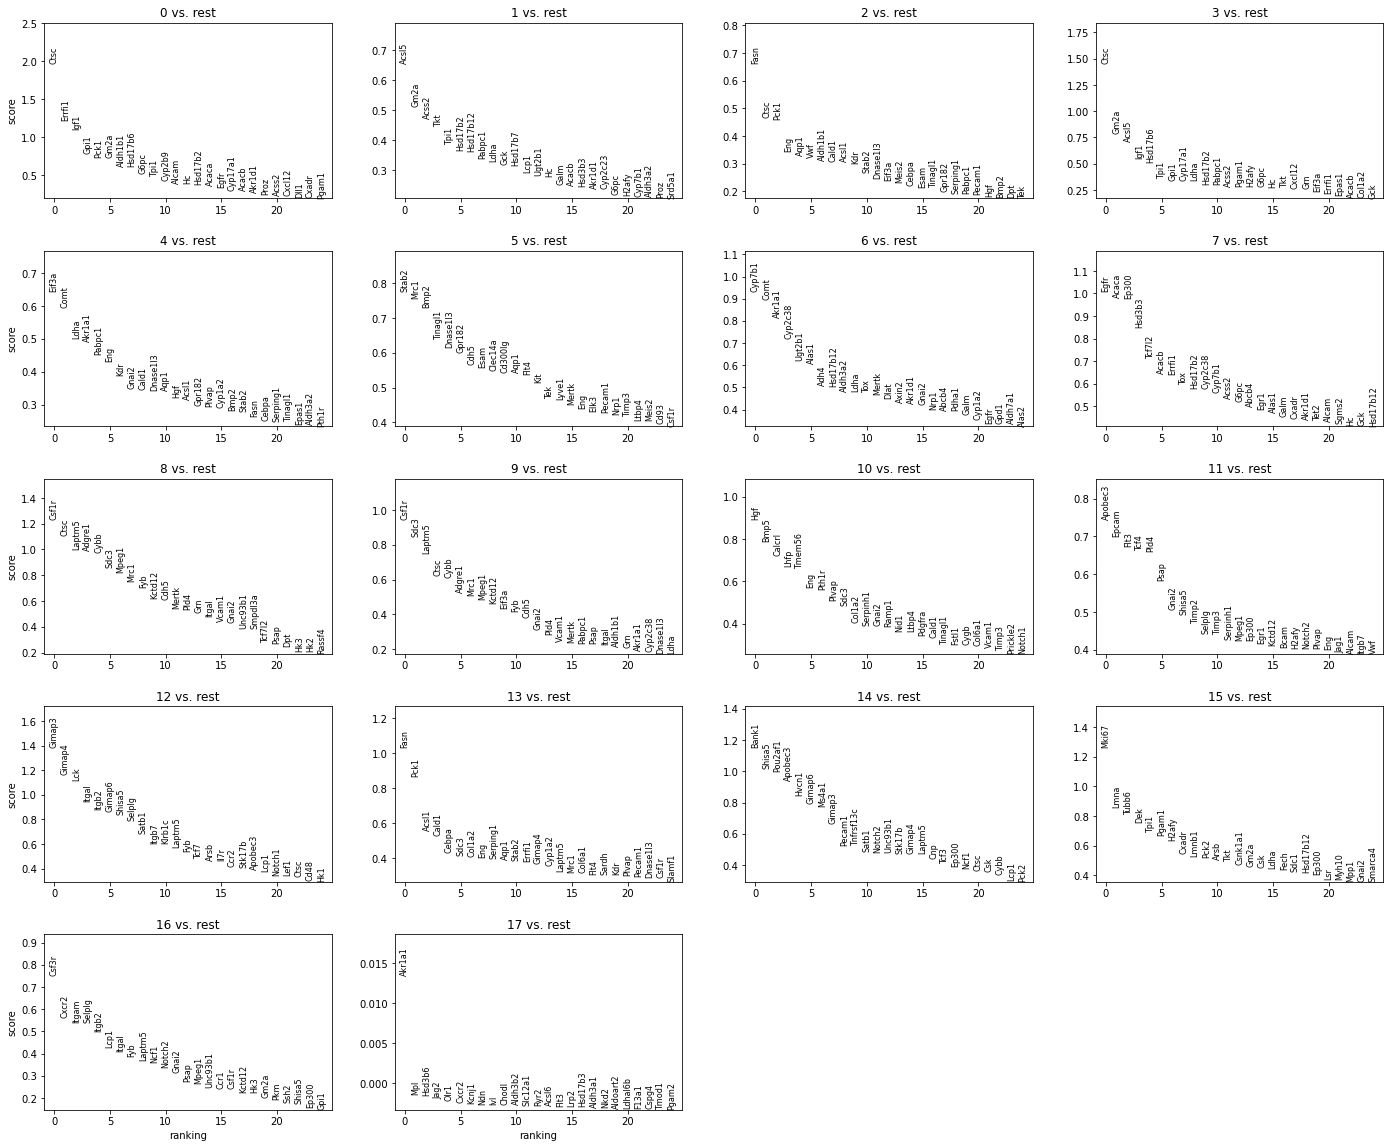

In [104]:
t_test_com,wilcoxon_com,n=DEanalysis(ad_sp_trans_com)

In [110]:
print("common PC transfer")
for i in range(n):
    a=set(t_test_com[i])
    b=set(wilcoxon_com[i])
    c=a.union(b)
    #print(t_test[i],wilcoxon[i])
    print(i,sorted(list(c)))

common PC transfer
0 ['Aldh1b1', 'Ctsc', 'Cyp17a1', 'G6pc', 'Hsd17b6', 'Pck1']
1 ['Acsl1', 'Acss2', 'Aldh3a2', 'Cyp1a2', 'Gck']
2 ['Aqp1', 'Cald1', 'Dnase1l3', 'Eif3a', 'Epas1', 'Fasn', 'Flt4', 'Gpr182', 'Kdr', 'Mpl']
3 ['Ctsc', 'Cyp17a1', 'Gm2a', 'Hc', 'Hsd17b6', 'Pck1', 'Serping1']
4 ['Acsl1', 'Aldh3a2', 'Cald1', 'Comt', 'Cyp1a2', 'Eif3a']
5 ['Aqp1', 'Dnase1l3', 'Eng', 'Kdr', 'Stab2']
6 ['Acsl1', 'Alas1', 'Aldh3a2', 'Axin2', 'Comt', 'Cyp1a2']
7 ['Cyp2b9', 'Egfr', 'Hc', 'Hsd3b3', 'Proz', 'Tet2']
8 ['Csf1r', 'Ctsc', 'Laptm5', 'Psap', 'Sdc3']
9 ['Csf1r', 'Cybb', 'Laptm5', 'Mpeg1', 'Sdc3']
10 ['Bmp5', 'Cxcl12', 'Eng', 'Hgf', 'Plvap', 'Pth1r']
11 ['Dpt', 'Gnai2', 'Jag1', 'Lhfp', 'Ltbp4', 'Timp3']
12 ['Gimap3', 'Gimap4', 'Itgal', 'Laptm5', 'Selplg', 'Shisa5']
13 ['Eno4', 'F13a1', 'Flt3', 'Hsd3b6', 'Jag2', 'Mpl', 'Sfrp1', 'Tnfrsf13c']
14 ['Apobec3', 'Bank1', 'Gimap6', 'Hvcn1', 'Laptm5', 'Pou2af1', 'Shisa5']
15 ['H2afy', 'Ldha', 'Lmna', 'Lsr', 'Mki67', 'Tpi1', 'Tubb6']
16 ['Csf3r', 'Cxcr2', 

In [107]:
ad_sp.obs.leiden.to_csv('TransferPCs/spatial_cluster.dat',header=True)
ad_sp_trans_ful.obs.leiden.to_csv('TransferPCs/transfer_full.dat',header=True)
ad_sp_trans_com.obs.leiden.to_csv('TransferPCs/transfer_com.dat',header=True)

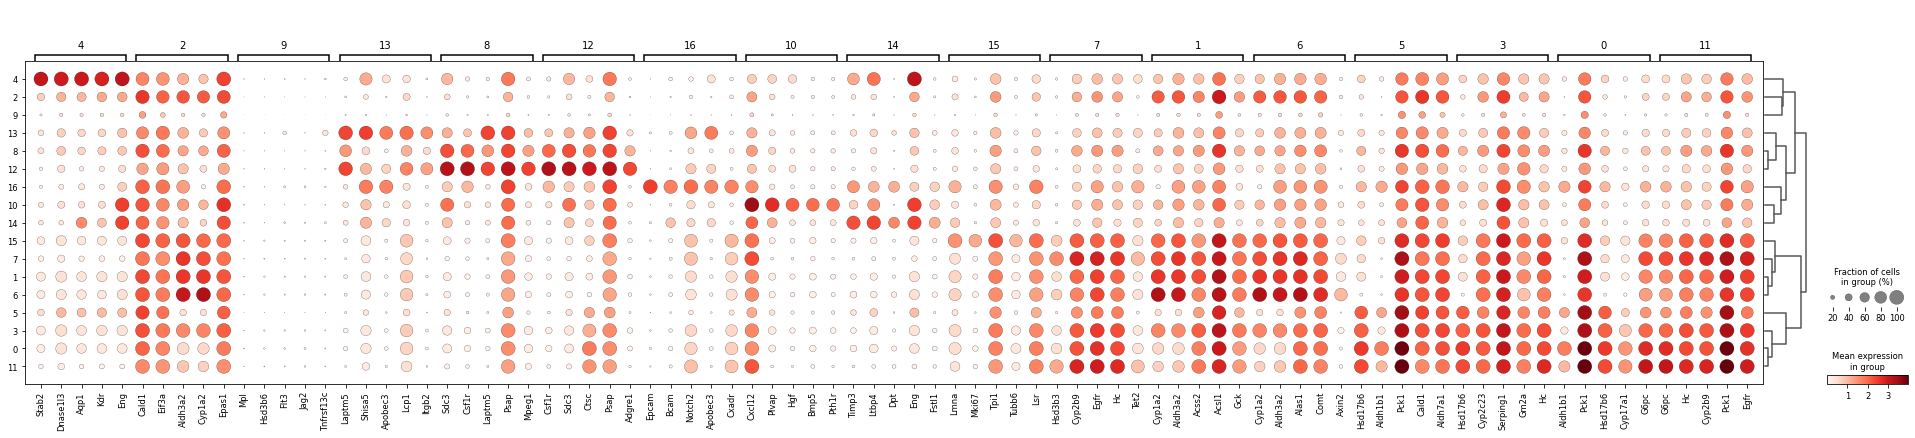

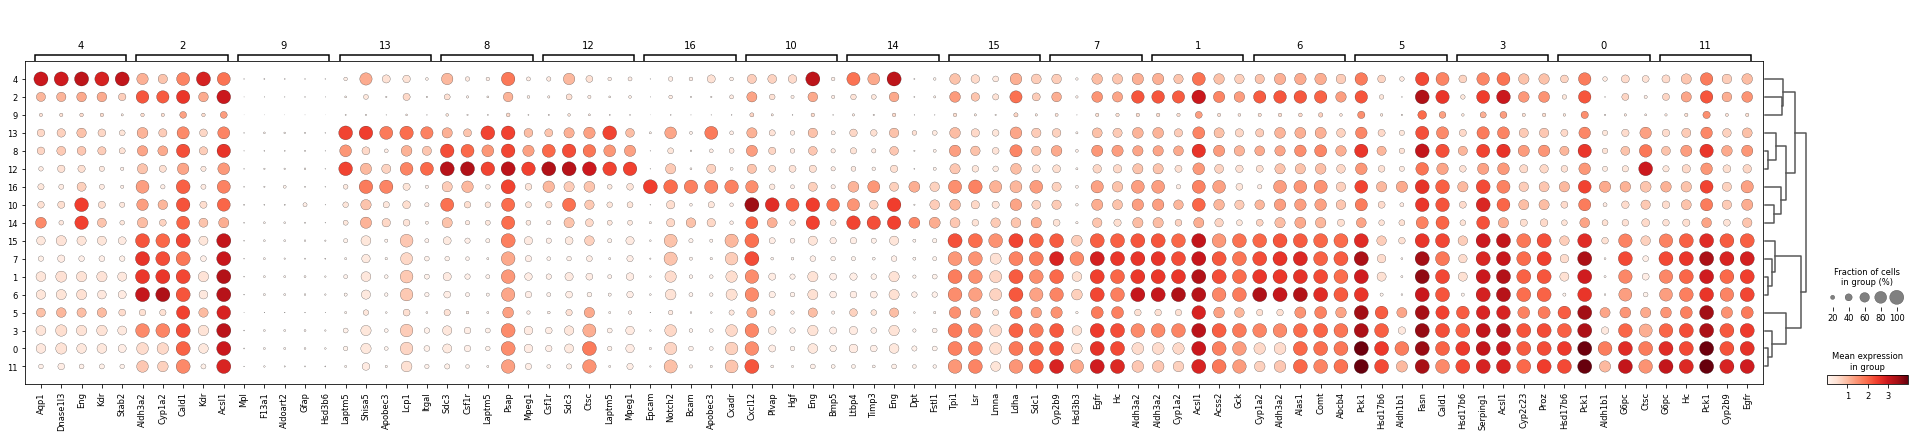

In [41]:
sc.pl.rank_genes_groups_dotplot(ad_sp, n_genes=5, key="wilcoxon", groupby="leiden")
sc.pl.rank_genes_groups_dotplot(ad_sp, n_genes=5, key="t-test", groupby="leiden")
#sc.pl.rank_genes_groups_dotplot(ad_sp, n_genes=5, key="logreg", groupby="leiden")